# How Equitable is Citi Bike?

<img src="../images/e.png" width="800" height="60"></img>

This project aims to answer the question **How equitable is the distribution of Citi Bike stations in NYC in 2017 with respect to usage, race, and income?**

#### Team Members 
- Seonghee Lee (sl994) 
- Nicholas Rahardja (nmr73)
- Chelsea Choi (cc2583)

<br/>

_______________


## Contents of this Notebook

1. Introduction
2. Data Description 
3. Pre Registration Statement 
4. Data Analysis 
5. Evaluation of Significance 
6. Interpretation and Conclusion
7. Limitations 
8. Source Code
9. Acknowledgement 
10. Appendix 
<br/> 

_______________

# 1. Introduction

1. Context of Work & Project Design
2. Research Question
3. Limitations
4. Main Findings & Summary of Results


#### 1. Context of Work & Project Design

Starting with Tulsa, Oklahoma's program launched in 2007, more than 60 U.S. cities now have bike-share systems. **However, whether or not these bike-sharing systems are truly accessible for all demographics is questionable.** For example, [study done by Portland State University](https://trec.pdx.edu/research/project/884) finds that significant portions of the population are underrepresented among bike share users, including people of color, lower-income, and less-educated groups.

In this project, we look at **how the fairness of bike-sharing systems applies to New York City's Citi Bike.** We have chosen to focus our analysis on NYC, and Citi Bike since New York City is one of the most diverse cities globally, and Citi Bike is the predominant bike-share system used in NYC. More specifically, **we will look into how Citi Bike stations are distributed in NYC and how this relates to the following factors: 1) Citi Bike Usage 2) Race & Income.** Lastly, after gaining insight into the factors that influence how Citi Bike stations are distributed, we will attempt to provide recommendations for Citi Bike's distribution of stations to ensure that the placements of stations match demand and that all demographics are fairly represented.


#### 2. Research Question

**How equitable is the distribution of Citi Bike stations in NYC in 2017 with respect to usage, race, and income?**. 

#### 3. Limitations 

We used NYC race and income data in 2017 since census data is only collected every ten years. Thus 2017 was the latest version we could find. We also limited ourselves to only analyzing Citi Bike trips in 2017 since the trip data set was huge. Lastly, we only considered Citi Bike stations that had been opened during or before 2017 to adhere to the parameters of the other data sets. 

We chose to delineate NYC by census tracts since a census tract represents the smallest geographic region in the USA's annual census. Furthermore, each census tract is identified by its geoid. Thus, a census tract is roughly equivalent to a neighborhood: encompassing a population between 2500 to 8000 people. <a href="https://popfactfinder.planning.nyc.gov/#11.77/40.7438/-73.99">This link </a> has a visualization of census tracts in NYC.

#### 4. Main Findings & Summary of Results 

Intuitively, one might expect demand to be the most decisive factor that influences the placement of Citi Bike stations. However, through linear regression, we found that the relationship between trips and stations is moderate and other factors such as location, race, and income influence the placement of stations. More specifically, we found that more stations are placed in whiter and higher-income census tracts, which meets the demand of these areas. Moreover, stations in Asian census tracts are utilized the most, indicating a higher need, whereas stations in black census tracts are utilized the least. This led us to conclude that the current distribution of Citi Bike stations under-represents Asian census tracts, and Citi Bike is not actively making efforts to alleviate the situation.



_______________

In [1]:
#importing libaries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas import DataFrame
import folium
from folium import plugins
from folium.plugins import HeatMap

# 2. Data Description 

For this project we used 3 different data sets. 
1. Citi Bike Trip Data
2. Citi Bike Station Data
3. NYC Race and Income Data

The data cleaning process of for these datasets are <a href="https://github.com/shljessie/citibike-nyc/tree/master/data_cleaning">linked here</a>

### Dataset 1: Citi Bike Trip Data

In [2]:
trips_df = pd.read_csv('../data/citibike_trip_final.csv')
print('Number of Rows: {}'.format(trips_df.shape[0]))
print('Number of Columns: {}'.format(trips_df.shape[1]))
trips_df.head()

Number of Rows: 14049057
Number of Columns: 9


,start_time,stop_time,start_station_name,end_station_name,birth_year,gender,start_station_geoid,end_station_geoid,trip_minutes
0,2017-01-01 00:00:21,2017-01-01 00:11:41,W 82 St & Central Park West,Central Park West & W 72 St,1965.0,2,3.606102e+10,3.606101e+10,11
1,2017-01-01 00:00:45,2017-01-01 00:22:08,Cooper Square & E 7 St,Broadway & W 32 St,1987.0,2,3.606100e+10,3.606101e+10,21
2,2017-01-01 00:05:00,2017-01-01 00:14:20,Broadway & W 60 St,9 Ave & W 45 St,1973.0,1,3.606101e+10,3.606101e+10,9
3,2017-01-01 00:05:37,2017-01-01 00:19:24,Broadway & W 37 St,E 10 St & Avenue A,1977.0,2,3.606101e+10,3.606100e+10,13
4,2017-01-01 00:05:47,2017-01-01 00:10:02,York St & Jay St,Carlton Ave & Flushing Ave,1989.0,1,3.604700e+10,3.604702e+10,4


##### 1. What are the observations (rows) and the attributes (columns)?
Each observation in this data set corresponds to a trip taken on Citi Bike in 2017. The following are the features that are recorded for each trip:

- start_time: Datetime object for the date and start time of the trip
- stop_time: Datetime object for the date and end time of the trip
- start_station_name: Name of trip start station, a string
- end_station_name: Name of trip end station, a string
- birth_year: Year rider was born, an integer
- gender: (Zero=unknown; 1=male; 2=female)
- trip_minutes: Duration of the trip in minutes, an integer
- start_station_geoid: Unique identifier for the census tract that the trip started in, an integer
- end_station_geoid: Unique identifier for the census tract that the trip ended in, an integer.


##### 2. Why and who funded the creation of this dataset?

This dataset was created to help developers, engineers, statisticians, artists, academics, and the local public gain insights into where Citi Bike users ride, how far they go, and what stations are the most popular. It’s an open dataset aimed at aiding the public in finding insights about the system. Lyft, the Citi Bike program operator in New York City and Jersey City, funds the collection of Citi Bike data. The raw dataset was collected from this [source](https://www.citibikenyc.com/system-data)


##### 3.What processes might have influenced what data was observed and recorded and what was not?

Citi Bike uses staff trips to monitor Citi Bike’s functionality, which is not representative of user data. Moreover, relocation of bikes overnight and broken bikes may also influence the number of trips. 

##### 4. What preprocessing was done, and how did the data come to be in the form that you are using?

First, we dropped columns that we would not be using and removed rows that had NaN values in them. Furthermore, we decided to focus on subscriber data since more than 90% of the original trips are taken by subscribers and due to the dataset’s size. We have also dropped trips over 3 hours since these users are more likely to have forgotten to return the bikes. Users are charged $0.18 per minute for trips longer than 30 minutes, so using Citi Bikes for extended periods is unreasonable. Furthermore, we changed any spaces to underscores in the column names.

##### 5. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

In signing up for Citi Bike users consent to Citi Bike’s data collection. Citi Bike collects data on the user’s trip data. Users expect Citi Bike to utilize this data to improve the user experience. 

##### 6. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/drive/folders/11YUr4yiiFKCNlN2MnGPGpCeXyrq92A0Z?usp=sharing



### Dataset 2 : Citi Bike Stations Data

In [3]:
stations_df = pd.read_csv('../data/citibike_stations_final.csv')
print('Number of Rows: {}'.format(stations_df.shape[0]))
print('Number of Columns: {}'.format(stations_df.shape[1]))
stations_df.head()

Number of Rows: 839
Number of Columns: 10


,station_id,station_name,lat,lon,first_trip,last_trip,geoid,trips_starting_here_2017,trips_ending_here_2017,total_trips_2017
0,254.0,W 11 St & 6 Ave,40.735324,-73.998004,2013-06-01,2019-07-31,36061006300,141183,143935,285118
1,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,2013-06-01,2019-07-31,36061006300,141183,143935,285118
2,253.0,W 13 St & 5 Ave,40.735439,-73.994539,2013-06-01,2018-10-31,36061006300,141183,143935,285118
3,345.0,W 13 St & 6 Ave,40.736494,-73.997044,2013-06-01,2018-10-31,36061006300,141183,143935,285118
4,151.0,Cleveland Pl & Spring St,40.721816,-73.997203,2013-06-01,2019-07-31,36061004100,121704,118537,240241


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a unique Citi Bike station in NYC. The following are the features for each station that is collected in this dataset:

- station_id: Unique identifier for a station, an integer
- station_name: Name of the station, a string
- lat: Latitude of the station, a float
- lon: Longitude of the station, a float
- first_trip: Date of the first trip taken from the station, DateTime object
- last_trip: Date of the last trip taken from the station, at the time this dataset was download, DateTime object
- geoid: Unique identifier for the NYC census tract that the station is located in, an integer
- trips_starting_here_2017: number of trips taken from this station in 2017, an integer
- trips_ending_here_2017: number of trips ending at this station in 2017, an integer
- total_trips_2017: total number of trips taken to and from this station in 2017, an integer


##### 2. Why and who funded the creation of this dataset?

The base dataset for this table came from the same source as the Citi Bike trip data set described above. However, a team from MIT performed more processing to derive the Citi Bike stations in NYC for research purposes. Therefore, MIT partially funded the creation of this Citi Bike station data set. [MIT Media Lab research](https://github.com/aberke/income-race-bikes/tree/master/data/nyc-bike)

##### 3.What processes might have influenced what data was observed and recorded and what was not?

A small number of stations are located on the boundary between two census tracts and the first census tract returned by the API was selected. 

##### 4. What preprocessing was done, and how did the data come to be in the form that you are using? (Link API?)

The original Citi Bike station data was already well formatted, but did not include the geoid of that station. We used an [API](https://geo.fcc.gov/api/census/) to obtain the geoid corresponding to the census tract that the station is located in. Next, since our project focuses on 2017, we removed all stations that were created after 2017. We also renamed a few columns to make their names more intuitive such as renaming ‘id’ to ‘station_id’ and ‘name’ to ‘station_name’. 

##### 5. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

Since this data set is derived from the Citi Bike trips dataset, users had similar expectations in data collection and usage.

##### 6. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 

https://drive.google.com/file/d/1pATvzg-PTpPvs_8x5pKIs_jqlbKrWyat/view?usp=sharing


### Dataset 3 : NYC Race and Income Data in 2017

In [4]:
race_income_df = pd.read_csv('../data/race_and_income_final.csv')
print('Number of Rows: {}'.format(race_income_df.shape[0]))
print('Number of Columns: {}'.format(race_income_df.shape[1]))
race_income_df.head()

Number of Rows: 4775
Number of Columns: 10


,geoid,2017_median_income,2017_population,2017_white_population,2017_black_population,2017_asian_population,2017_other_population,2017_2_or_more_races,cent_lon,cent_lat
0,36001000100,27250,1939,502,1142,16,112,167,-73.736313,42.668922
1,36001000200,24091,4731,710,3474,104,32,411,-73.751504,42.664413
2,36001000300,33454,5558,2589,1539,559,291,580,-73.782679,42.680905
3,36001000401,74255,2459,2183,131,92,28,25,-73.864883,42.706315
4,36001000403,70815,4695,3256,714,416,79,230,-73.805276,42.676872


##### 1. What are the observations (rows) and the attributes (columns)?

Each observation in this data set corresponds to a different census tract in NYC. For each census tract the following are the attributes in the dataset.

- geoid: Unique identifier for the census tract that the station is located in, an integer
- 2017_median_income: Median income (dollars) in the census tract in 2017, an integer
- 2017_population: Total population in the census tract in 2017, an integer
- 2017_white_population: Total number of White individuals in the census tract, an integer
- 2017_black_population: Total number of Black individuals in the census tract, an integer
- 2017_asian_population: Total number of Asian individuals in the census tract, an integer
- 2017_2_or_more_races : Total number of individuals who identify as two or more races in the census tract, an integer
- cent_lon : Central longitude of census tract, a float 
- cent_lat : Central latitdue of census tract, a float 

##### 2. Why was this dataset created?

This dataset was created in order to study the census tract data along with the associated race and income in 2017. This was done by extracting the household median income and household race from the American Community Survey.

##### 3. Who funded the creation of the dataset?

This data was created and funded by the [United States Census bureau ACS](https://data.census.gov/cedsci/). The creation of this dataset was by the [MIT Media Lab](https://github.com/aberke/income-race-bikes/blob/master/data/ny/race_and_income_data.csv)

##### 4. What processes might have influenced what data was observed and recorded and what was not?

The American Community Survey’s data collection process first randomly selects 3.5 million addresses to reply to the survey: to represent the entire population. Because this survey is limited to those with addresses, there may be families and individuals not accounted for, like the homeless population. Moreover, individuals may have decided not to respond to the survey. 

##### 5. What preprocessing was done, and how did the data come to be in the form that you are using?

We dropped rows where the median income was missing or had NaN values. Furthermore, for census tracts with median income values of '$250,000+,' we changed the median income value to '250,000', a numeric value. Lastly, we only kept the race and income data for 2017. 

##### 6. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

The individuals contacted were aware of the data collection since the constitution states that a census must be taken every ten years. Therefore, citizens understand that the census is used to determine where federal and state funding should be spent. Moreover, their data is protected from being shared and used by any other government agency.

##### 7. Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box). 
https://drive.google.com/file/d/1obfrrDul07XDXEvyK6kf-N66_2K5-g88/view?usp=sharing
<br> 

_________

# 3. Preregistration Statement 

### Analysis 1: What is the relationship between Citi Bike trips and number of stations in a census tract?

>Here we are mainly attempting to answer the question, "Are there more stations in areas of higher usage?" To do this, we will use graphs to explore the relationship between Citi Bike usage (trips) and the number of stations in a geoid and confirm the relationship/absence of a relationship through **Linear Regression** and other statistical findings. Additionally, we will investigate any anomalies in this relationship.

       
### Analysis 2: What is the relationship between station placements and the race & income demographic of the census tract? 

>Here, we will look into whether the placement of Citi Bike stations are influenced by the race and income demographics of a census tract. We will then use **Logistic Regression** to model this relationship. 

# 4. Data Analysis 

## Analysis 1: What is the Relationship between Citi Bike Trips and Number of Stations in a Census Tract?

#### Trips vs Number of Stations in a Census Tract

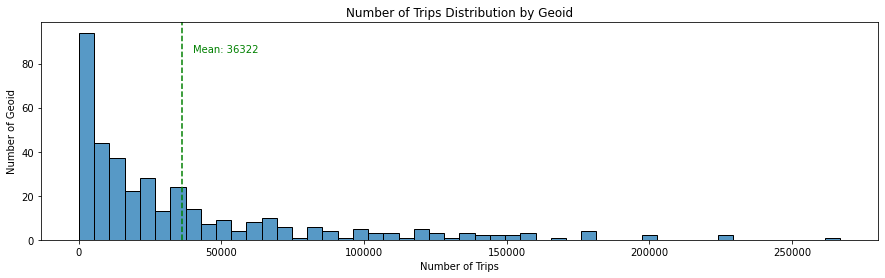

Average Number of Trips :  36322
Min Number of Trips :  47
Max Number of Trips :  266800


In [5]:
#group by geoid and count number of stations
stations_geoid = stations_df.groupby(['geoid']).size().reset_index(name = 'Number of Stations')
stations_geoid = stations_geoid.sort_values('Number of Stations', ascending=False)

#remove park geoids, as these census tracts do not have any race and income informaion
geoids_remove=['36061014300','36047017700','36061000500','36081009900','36061031703','36047001800','36081003700']
stations_geoid = stations_geoid[~stations_geoid['geoid'].isin(geoids_remove)]

## Number of Start Stations at each geoid
trips_start_df = trips_df.groupby(['start_station_geoid']).size().reset_index(name = 'Number of Trips')
trips_start_df = trips_start_df.sort_values('Number of Trips', ascending=False)
trips_start_df = trips_start_df.rename(columns={'start_station_geoid': 'geoid'})
trips_start_df= pd.merge(stations_geoid,trips_start_df,  on=['geoid'], how='inner')

# Average Calculation 
mean_start= np.mean(trips_start_df['Number of Trips'])

# Max and Min Trips Calculation
min_start=np.min(trips_start_df['Number of Trips'])
max_start=np.max(trips_start_df['Number of Trips'])

# Draw the Number of Trips plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(15,4),sharey=True)
sns.histplot(data=trips_start_df,x="Number of Trips",bins=50,ax=ax1)
ax1.axvline(mean_start, color="green", linestyle="dashed")
ax1.text(40000,85,'Mean: 36322', fontsize=10, color='green')
ax1.set_title("Number of Trips Distribution by Geoid")
ax1.set_xlabel('Number of Trips')
ax1.set_ylabel('Number of Geoid')
plt.show()

print("Average Number of Trips : ","{:.0f}".format(mean_start))
print("Min Number of Trips : ","{:.0f}".format(min_start))
print("Max Number of Trips : ","{:.0f}".format(max_start))

Before looking into the relationship between trips and the number of stations, we first wanted to know more about the distribution of trips by geoid. From this histogram, we see that there are, on average, 36322 trips taken in each census tract. The minimum number of trips taken from a geoid is 47, and the maximum number is 266800.

From this histogram, we see that the distribution of the number of trips across census tracts is right-skewed, and the majority of geoids have 0-50000 trips taken. Now that we understand the distribution of stations we will look into how stations relate to the number of trips. 


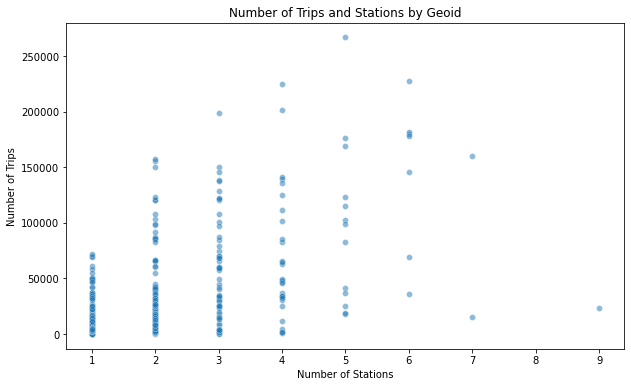

In [6]:
fig, (ax1) = plt.subplots(figsize=(10,6))

## Start Stations
sns.scatterplot(y="Number of Trips", x="Number of Stations", data=trips_start_df,ax=ax1, alpha=0.5)
ax1.set_title("Number of Trips and Stations by Geoid")
ax1.set_xlabel("Number of Stations")
ax1.set_ylabel("Number of Trips")
plt.show()

This scatter plot shows the number of stations and the number of trips taken from that census tract. Each point in the scatter plot corresponds to a unique census tract in NYC. 

Looking at census tracts with one to five stations, the variance in the number of trips taken from the census tract increases with the number of stations. We also see that some census tracts with comparatively more stations have a very low number of trips. For example, the geoid with nine stations has below 50000 trips which is a relatively small number of trips compared to tracts with one or two stations that have a similar number of trips. This indicates that there might be an overabundance of stations in some geoids.

Overall, there seems to be a moderately positive linear relationship between stations and trips. However, since there is significant variability in the number of trips between census tracts with the same amount of stations, there must be other factors, such as race, income, and location, which influence station placement. 

In the next step, we will take a closer look at the location of census tracts with six, seven, and nine stations. We want to know what may be influencing the placement of stations in these geoids. Although location wasn't an initial preregistered analysis or mentioned in our research question, we believe that it may be important in explaining the distribution of stations. To research further, we decided first to take a closer look at where these census tracts are located.


#### Where are the Census Tracts with Large Amount of Stations Located?


In [7]:
# extract geoids with 6,7,9 stations
print(trips_start_df.loc[trips_start_df['Number of Stations'].apply(lambda x: True if x in [6,7,9] else False)].sort_values(by=['Number of Stations']))

         geoid  Number of Stations  Number of Trips
3  36061009900                   6           228036
4  36061008300                   6           180253
5  36047003500                   6            69406
6  36047051500                   6            35621
7  36061010300                   6           181434
8  36061004400                   6           178200
9  36061002100                   6           145449
1  36061000700                   7           159969
2  36081001900                   7            15514
0  36047005300                   9            23110


<img src="../images/4.png" width="700">

In [8]:
#Calculate a quantile metric
print("Percentile of Number of Trips")
print(trips_start_df[['Number of Trips']].quantile([.5,.6,.90, .95]))

Percentile of Number of Trips
      Number of Trips
0.50          18126.0
0.60          26840.8
0.90         101431.6
0.95         138472.4


The colored map above shows the census tracts with six, seven, and nine stations. We located these census tracts through the NYC dot. We also created a table containing the number of stations and the number of trips taken from a geoid and observations corresponding to the marked census tracts on the map. The information listed below are all estimates we have made as to why these censuses have many stations.

##### Census Tracts with 6 Stations
The geoids labeled A, B, C, D, and E are all located near a dock area and are all above the 95th percentile for the number of trips. Thus, both of these factors may explain why there are many stations in this census tract. 

In contrast, six stations in geoid F don't seem to have a significant relationship with location or number of trips. For example, it isn't located in a dock area, and there are also no parks nearby. Also, the number of trips taken at this geoid is relatively low, indicating that other factors might be influencing station placements in this census tract. 

Census tract G seems to have a park located within that geoid. Though the number of trips taken at this point is below the 60th percentile, the presence of a park may be influencing the number of stations in this census tract.

##### Census Tracts with 7 Stations
For geoids with seven stations, the geoid labeled H is located in a dock area with 159969 trips taken from those stations, above the 95th percentile. Thus, in geoid H, both location and a significant amount of trips seem to have contributed to the placement of seven stations in this census tract.

On the other hand, census tract I is below the 50th percentile in terms of its number of trips, but it is located near a dock area, which means that its location might have influenced this large number of stations. 

##### Census Tracts with 9 Stations
Geoid J has nine stations, meaning that this census tract has the most number of stations. However, the number of trips taken from this census tract is below the 60th percentile, which might indicate that its location near a dock plays a significant role in influencing the number of stations in this census tract.

Looking at the location and the number of trips of these geoids, we found that many are located in dock areas or have a park. This shows that Citi Bike tends to place its stations in public spaces despite having relatively fewer trips (50th~60th percentile) in some census tracts. 

Having seen how location might influence station placement, we will next return to looking at the relationship between trips and stations by conducting a linear regression.
 

### Linear Regression of Trips vs Stations

#### Formula: 
>$y_i = \alpha + \beta_1 Stations$ 

#### Hypothesis
We expect that census tracts with more stations will have more trips.

>##### H0: There is no relationship between the number of trips and the number of stations in a geoid
>##### Ha: There is a relationship between the number of trips and the number of stations in a geoid

$\alpha$ = 0.05. 

Predictor = number of stations

Response = number of trips
 

Coefficient of Linear Regression (StartStations): 1.84e+04
Coefficient of determination (r2) for Start Stations: 0.28


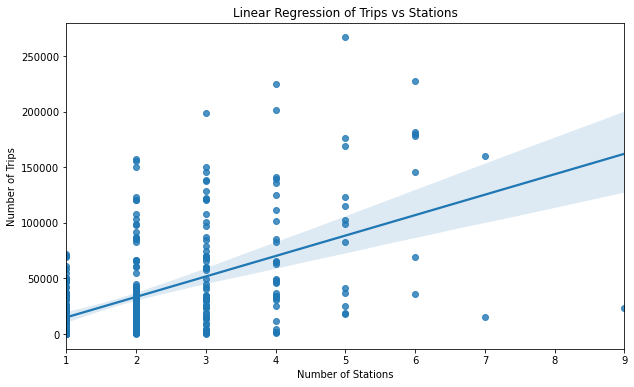

In [9]:
X = trips_start_df.iloc[:, 1].values.reshape(-1, 1) 
Y = trips_start_df.iloc[:, 2].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
lr=linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X) 

fig = plt.subplots( figsize=(10,6))
sns.regplot(x=X, y=Y)
plt.title('Linear Regression of Trips vs Stations')
plt.xlabel('Number of Stations')
plt.ylabel('Number of Trips')

print("Coefficient of Linear Regression (StartStations): {:.3g}".format(lr.coef_[0][0]))

residual = Y-Y_pred
mean_Y= np.mean(Y)
rsq=residual *residual
ssr =sum(rsq)
sst = sum((Y-mean_Y)**2)
deter=ssr/sst

print("Coefficient of determination (r2) for Start Stations: {:.2f}".format(1-deter[0]))



Above, we have computed an sns regplot. The blue line refers to the linear regression line. The translucent band lines describe a bootstrap confidence interval generated for the estimate. Here we can see that as the number of stations increases, the range of the bootstrap confidence interval increases too.  The linear regression slope is 1.48e-0.5 which tells us that when the number of trips in a census tract increases by one, the number of stations in the census tract increases by 1.84e+04. 

We can interpret 𝑟2 as the fraction of the variation in the output variable that can be explained (or predicted) by variation in the input variable(s). Therefore, our r2 score of 0.28 means that approximately only  28% (0.28) of the variation in the number of trips can be explained by the number of stations. Next we will compute additional statistics for this relationship. 


In [10]:
pear_corr=trips_start_df['Number of Trips'].corr(trips_start_df['Number of Stations'])
sp_corr= trips_start_df['Number of Trips'].corr(trips_start_df['Number of Stations'],method='spearman')

print('Pearson Correlation: ',"{:.2f}".format(pear_corr))
print('Spearman Correlation: ',"{:.2f}".format(sp_corr))

Pearson Correlation:  0.53
Spearman Correlation:  0.48


To further understand the strength of the relationship, we will look at the correlation. We observe a Pearson correlation of 0.53 and a Spearman Correlation of 0.48. This indicates a linear relationship of only moderate strength. Furthermore, combined with a relatively low R^2 value, we can conclude that other factors must also influence the distribution of stations across census tracts. So next, we will be looking at the race and income distribution of NYC census tracts alongside the placement of stations to explore the relationship between stations and race and income. 

## Analysis 2: What is the relationship between station placement and NYC race & income?

To further our understanding of the factors influencing Citi Bike station placements, we will look into the relationship between the race, income, and the number of stations located in a census tract.

### Stations vs Racial Distribution 

We will first try to understand the relationship between station placement and the racial distribution of census tracts. NYC is a very diverse city where particular ethnic groups are known to congregate in specific neighborhoods, such as in Chinatown. Therefore, we decided first to categorize each census tract by their majority race. In the original dataset we had four categories, black, white, asian, and other. However, since the race category "other" is ambiguous and potentially misleading, we will not include this category in our analysis. In our first step, we categorized each geoid by the majority race. Then we showed the total number of stations for each majority race. In other words, we added the number of stations in geoids with majority white race, black race and asian race.

In [11]:
race_income_df['white_pct'] = 100*(race_income_df['2017_white_population'] / race_income_df['2017_population'])
race_income_df['black_pct'] = 100*(race_income_df['2017_black_population'] / race_income_df['2017_population'])
race_income_df['asian_pct'] = 100*(race_income_df['2017_asian_population'] / race_income_df['2017_population'])
race_income_df['other_pct'] = 100*(race_income_df['2017_other_population'] / race_income_df['2017_population'])
# Combining the race and stations
race_st_df = (race_income_df.set_index('geoid')).join((stations_df.set_index('geoid')),how='inner')
race_st_df['geoid'] = race_st_df.index
race_st_df.reset_index(drop=True,inplace=True)
# Counting the number of stations per geoid
stations =race_st_df.groupby('geoid')[['station_id']].count()
stations.rename(columns={'station_id':'num_stations'},inplace=True)
stations.reset_index(inplace=True)
race_st_df = race_st_df.set_index('geoid').join(stations.set_index('geoid'),how='inner')
race_st_df.reset_index()
race_st_df[:1]
# assigning the majority race based on the max percentage race in each geoid
race_st_df['majority_race'] = race_st_df[['white_pct','black_pct','asian_pct', 'other_pct']].idxmax(axis=1)
# Only returns the census tracts where that race is the majority
w_major = race_st_df[race_st_df['majority_race'] == 'white_pct']
b_major = race_st_df[race_st_df['majority_race'] == 'black_pct']
a_major = race_st_df[race_st_df['majority_race'] == 'asian_pct']
o_major = race_st_df[race_st_df['majority_race'] == 'other_pct']

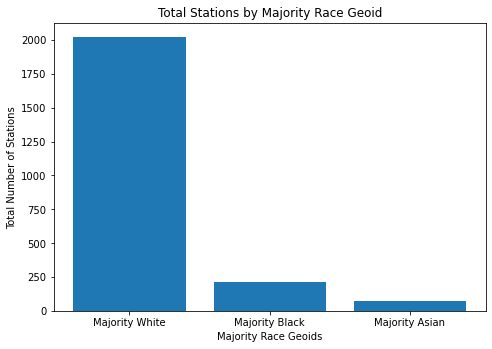

In [12]:
w_list = []
b_list = []
a_list = []
o_list = []
for i  in range(10):
    w_list = w_list + [race_st_df[race_st_df['num_stations'] == i].white_pct.mean()]
    b_list = b_list + [race_st_df[race_st_df['num_stations'] == i].black_pct.mean()]
    a_list = a_list + [race_st_df[race_st_df['num_stations'] == i].asian_pct.mean()]
    o_list = o_list + [race_st_df[race_st_df['num_stations'] == i].other_pct.mean()]
    
df = DataFrame (w_list,columns=['White Percentage'])
df['Black Percentage'] = b_list
df['Asian Percentage'] = a_list
df['Other Percentage'] = o_list
df= df[1:]
df = df.fillna(0)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = ['Majority White', 'Majority Black', 'Majority Asian']
x = [w_major.num_stations.sum(), b_major.num_stations.sum(), a_major.num_stations.sum()]
plt.bar(y,x)
plt.title('Total Stations by Majority Race Geoid')
plt.xlabel('Majority Race Geoids')
plt.ylabel('Total Number of Stations')
plt.show()

We will first try to understand the relationship between station placement and the racial distribution of census tracts. NYC is a very diverse city where particular ethnic groups are known to congregate in specific neighborhoods, such as in Chinatown. Therefore, we decided first to categorize each census tract by their majority race. In the original dataset, we had four categories, Black, White, Asian, and other. However, since the race category "other" is ambiguous and potentially misleading, we will not include this category in our analysis. Thus, in our first step, we categorized each geoid by the majority race. Then we showed the total number of stations for each majority race. In other words, we added the number of stations in geoids with the majority White, Black, and Asian ethnicity.

To better understand the relationship, we will look into the differences in racial distribution between census tracts with less than the median number of stations and the census tracts above the median number of stations.


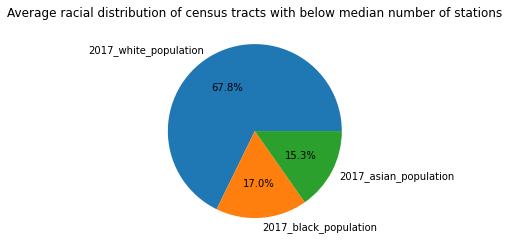

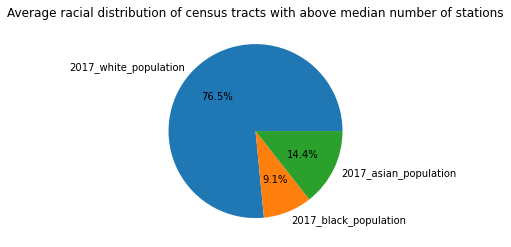

In [13]:
median_num_stations = int(race_st_df[['num_stations']].median())

#Census Tracts with <= median number of stationm
low_station_geoid_race_income_df = race_st_df[race_st_df['num_stations']<=median_num_stations]
low_station_geoid_race_sum = low_station_geoid_race_income_df[['2017_white_population','2017_black_population','2017_asian_population']].sum()
mylabels = low_station_geoid_race_sum.index
plt.pie(low_station_geoid_race_sum,labels=mylabels,autopct='%1.1f%%')
plt.title('Average racial distribution of census tracts with below median number of stations')
plt.show()

##Census Tracts with > median number of stationm
high_station_geoid_race_income_df = race_st_df[race_st_df['num_stations']>median_num_stations]
high_station_geoid_race_sum = high_station_geoid_race_income_df[['2017_white_population','2017_black_population','2017_asian_population']].sum()
mylabels = high_station_geoid_race_sum.index
plt.pie(high_station_geoid_race_sum,labels=mylabels,autopct='%1.1f%%')
plt.title('Average racial distribution of census tracts with above median number of stations')
plt.show()

We see that, on average, census tracts with an above-median number of stations have 76.5% white individuals, whereas Census tracts that have less than the median number of stations are only 67.8% White. Furthermore, Census tracts with more stations appear to have half the number of black individuals (9.1%) than census tracts with fewer stations (15.3%). Lastly, census tracts with more stations than those with less also have slightly fewer Asians. Thus, these two pie charts imply that more stations are placed in census tracts with a higher percentage of White individuals and lower proportions of Black and Asian individuals. However, we cannot confirm this relationship through these pie charts alone, so next, we will use Logistic Regression to model this relationship.

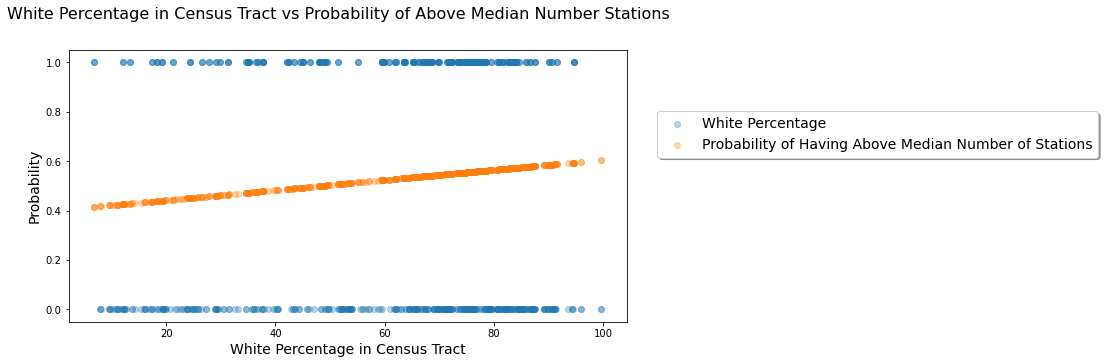

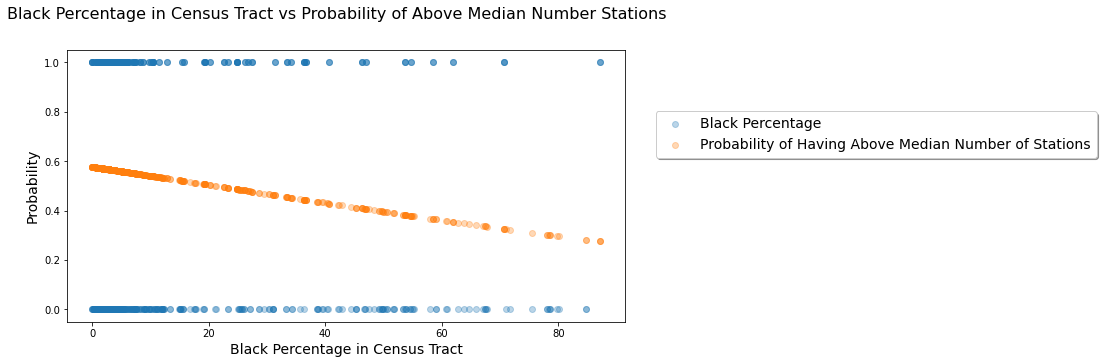

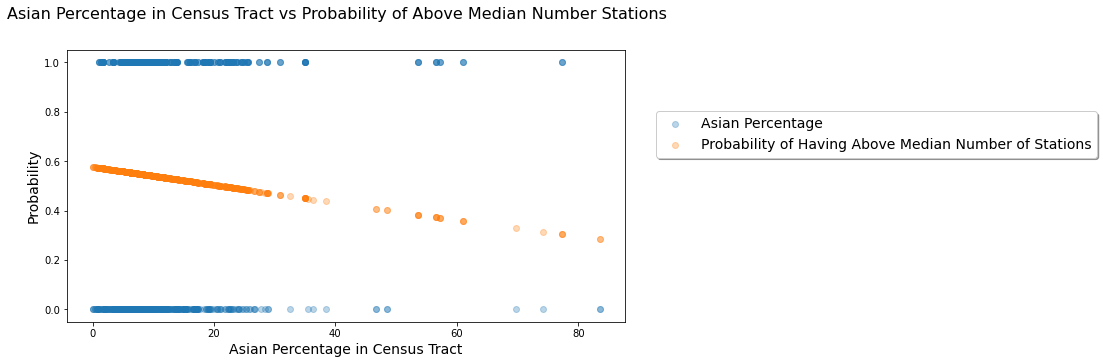

R^2 value of White Percentage and Above Median Stations: 0.54
R^2 value of Black Percentage and Above Median Stations: 0.56
R^2 value of Asian Percentage and Above Median Stations: 0.53


In [14]:
race_st_df['above_median_station'] = np.where(race_st_df['num_stations']>= median_num_stations, True, False)
racevsstations_w = LogisticRegression().fit(race_st_df[['white_pct']],race_st_df['above_median_station'])
predict_num_stations_w = racevsstations_w.predict(race_st_df[['white_pct']])

racevsstations_w.predict_proba(np.array([[50]]))
racevsstations_w.predict(np.array([[50]]))
# Logistic Regression for White Percentages and Above Median Number Stations
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.white_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='White Percentage'
)
plt.scatter(
    race_st_df.white_pct, 
    racevsstations_w.predict_proba(race_st_df[['white_pct']])[:,1], 
    alpha = 0.3,
    label='Probability of Having Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1, fontsize = 14)
plt.xlabel("White Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.suptitle('White Percentage in Census Tract vs Probability of Above Median Number Stations', size=16, y=1);      
plt.show()

# Logistic Regression for Black Percentages and Above Median Number Stations

racevsstations_b = LogisticRegression().fit(race_st_df[['black_pct']],race_st_df['above_median_station'])
predict_num_stations_b = racevsstations_b.predict(race_st_df[['black_pct']])
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.black_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Black Percentage'
)
plt.scatter(
    race_st_df.black_pct, 
    racevsstations_b.predict_proba(race_st_df[['black_pct']])[:,1], 
    alpha = 0.3,
    label='Probability of Having Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1 ,fontsize = 14)
plt.xlabel("Black Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.suptitle('Black Percentage in Census Tract vs Probability of Above Median Number Stations', size=16, y=1);      
plt.show()

#Logistic Regression for Asian Percentages and Above Median Number Stations
racevsstations_a = LogisticRegression().fit(race_st_df[['asian_pct']],race_st_df['above_median_station'])
predict_num_stations_a = racevsstations_a.predict(race_st_df[['asian_pct']])
fig = plt.figure(figsize = (10,5))

plt.scatter(
    race_st_df.asian_pct, 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Asian Percentage'
)
plt.scatter(
    race_st_df.asian_pct, 
    racevsstations_b.predict_proba(race_st_df[['asian_pct']])[:,1], 
    alpha = 0.3,
    label='Probability of Having Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1 ,fontsize = 14)
plt.xlabel("Asian Percentage in Census Tract", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.suptitle('Asian Percentage in Census Tract vs Probability of Above Median Number Stations', size=16, y=1);      
plt.show()

w_r_sqr = racevsstations_w.score(race_st_df[['white_pct']],race_st_df['above_median_station'])
print('R^2 value of White Percentage and Above Median Stations:', round(w_r_sqr,2))

b_r_sqr = racevsstations_b.score(race_st_df[['black_pct']],race_st_df['above_median_station'])
print('R^2 value of Black Percentage and Above Median Stations:', round(b_r_sqr,2))

a_r_sqr = racevsstations_a.score(race_st_df[['asian_pct']],race_st_df['above_median_station'])
print('R^2 value of Asian Percentage and Above Median Stations:', round(a_r_sqr,2))

Since the number of stations in a census tract is discrete, we decided to use logistic regression. Furthermore, since we wanted to use logistic regression to see if there are more stations in certain racial areas, we added a column that classifies whether the census tract has above the median number of stations. Thus, each of the three graphs shows how the predicted probability changes with the percentage of each race in the census tract: White, Black, and Asian. 

In the first graph, the predicted probability seems to have a positive slope. This indicates that census tracts with a higher proportion of White individuals have a greater likelihood of having more than the median stations. On the other hand, the negative slope in the second and third graphs suggests that census tracts with a higher proportion of Black or Asian individuals are less likely to have more than the median number of stations. Furthermore, we see that the three predictor models can account for 54%, 56%, and 53% of the variability in the data, meaning that we can conclude that this is a fairly strong relationship. Overall, these three graphs confirm the trend that we have seen previously: more stations are placed in White areas than Black and Asian Census tracts. We now want to look into other factors that influence the number of stations, such as the median income of a census tract.


### Stations vs Income 

Citi Bike's initial expansion into NYC focused on placing stations in high-income areas to ensure usage [Wenya et. al.](https://www.researchgate.net/publication/328756164_The_Cost-Effectiveness_of_Bike_Share_Expansion_to_Low-Income_Communities_in_New_York_City) Citi Bike membership costs an annual amount of 169 dollars [NYTimes](https://www.nytimes.com/2019/07/16/nyregion/citi-bike-nyc-bronx.html). 

However, Citi Bike also has a program that allows public housing residents and food stamp users to buy a membership at 60 dollars a year 2. With these two factors regarding cost in mind, it's essential to study whether station placement allows residents from different income brackets to utilize Citi Bikes.


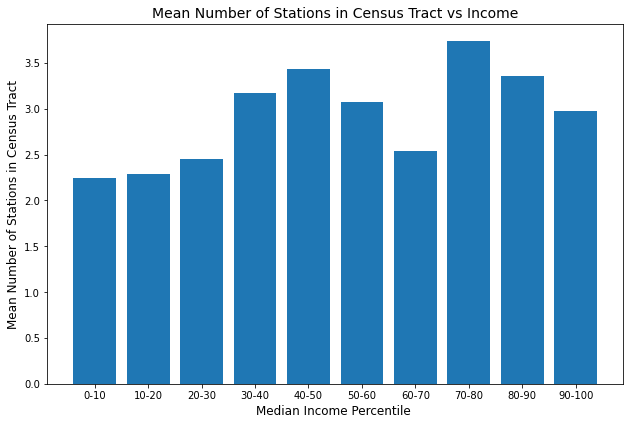

In [15]:
income = race_st_df['2017_median_income']
tenth = race_st_df[(race_st_df['2017_median_income']<=np.percentile(income, 10))].num_stations.mean()
bw_10_20 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 10)) & (race_st_df['2017_median_income']<=np.percentile(income, 20))].num_stations.mean()
bw_20_30 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 20)) & (race_st_df['2017_median_income']<=np.percentile(income, 30))].num_stations.mean()
bw_30_40 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 30)) & (race_st_df['2017_median_income']<=np.percentile(income, 40))].num_stations.mean()
bw_40_50 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 40)) & (race_st_df['2017_median_income']<=np.percentile(income, 50))].num_stations.mean()
bw_50_60 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 50)) & (race_st_df['2017_median_income']<=np.percentile(income, 60))].num_stations.mean()
bw_60_70 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 60)) & (race_st_df['2017_median_income']<=np.percentile(income, 70))].num_stations.mean()
bw_70_80 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 70)) & (race_st_df['2017_median_income']<=np.percentile(income, 80))].num_stations.mean()
bw_80_90 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 80)) & (race_st_df['2017_median_income']<=np.percentile(income, 90))].num_stations.mean()
bw_90_100 = race_st_df[(race_st_df['2017_median_income']> np.percentile(income, 90)) & (race_st_df['2017_median_income']<=np.percentile(income, 100))].num_stations.mean()
fig = plt.figure(figsize = (8,5))
ax = fig.add_axes([0,0,1,1])
y = ['0-10','10-20', '20-30', '30-40','40-50','50-60','60-70','70-80','80-90','90-100']
x = [tenth, bw_10_20, bw_20_30, bw_30_40, bw_40_50, bw_50_60, bw_60_70, bw_70_80, bw_80_90, bw_90_100]
plt.bar(y,x)
plt.title('Mean Number of Stations in Census Tract vs Income', fontsize = 14)
plt.xlabel('Median Income Percentile ', fontsize = 12)
plt.ylabel('Mean Number of Stations in Census Tract', fontsize = 12)
plt.show()

This bar graph groups census tracts based on their median income percentile and their average number of stations.  

From this graph, it seems that there's a general trend of increasing stations at higher percentiles of income. For example, at the zero to ten percentile, the mean number of stations is around 2.3. In contrast, census tracts under the 70th to 80th income percentile have approximately 3.7 stations. That being said, there are a few anomalies, which do not allow us to definitively conclude that more stations are being placed in Census Tracts with higher median income levels. To further analyze this trend, we will next use logistic regression to model this relationship.


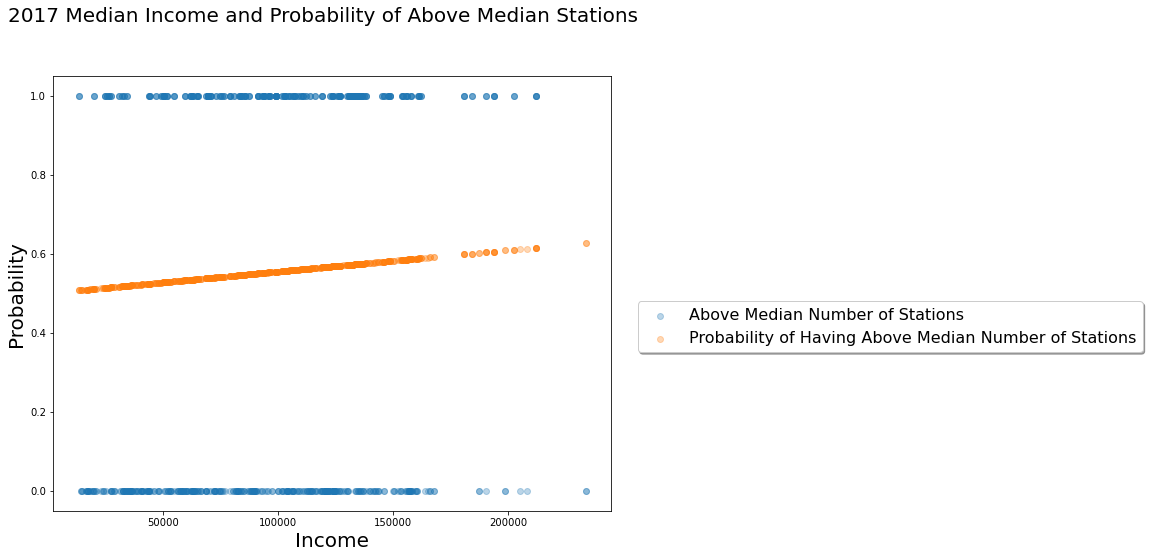

The r^2 value of median income and number of stations: 0.53


In [16]:
incomevsstations = LogisticRegression().fit(race_st_df[['2017_median_income']],race_st_df['above_median_station'])
predict_num_stations_income = incomevsstations.predict(race_st_df[['2017_median_income']])

incomevsstations.predict_proba(np.array([[50]]))
incomevsstations.predict(np.array([[50]]))
fig = plt.figure(figsize = (10,8))

# Plotting the probability of above median stations vs. income
plt.scatter(
    race_st_df['2017_median_income'], 
    race_st_df.above_median_station, 
    alpha = 0.3,
    label='Above Median Number of Stations'
)
plt.scatter(
    race_st_df['2017_median_income'], 
    incomevsstations.predict_proba(race_st_df[['2017_median_income']])[:,1], 
    alpha = 0.3,
    label='Probability of Having Above Median Number of Stations'
)
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 0.5),fontsize = 16, shadow=True, ncol=1)
plt.xlabel("Income", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.suptitle('2017 Median Income and Probability of Above Median Stations', size=20, y=1);      
plt.show()
income_sqr = incomevsstations.score(race_st_df[['2017_median_income']],race_st_df['above_median_station'])
print('The r^2 value of median income and number of stations:', round(income_sqr,2))

To further study and confirm the relationship we've observed between income and the number of stations, we decided to model this relationship with logistic regression. As a result, the predicted probabilities of having an above-median number of stations are plotted as the orange line in the graph. 

It would seem that at lower income levels, the probability is around .5. However, as the income within a census tract increases, the likelihood increases. This indicates that there is a greater probability of having a larger number of stations at higher income levels. Furthermore, because the r^2 value is .53, the prediction model explains 53% of the data, which is fairly good.

Now that we have seen that more stations are generally placed in White and higher-income areas, we next want to look into whether this is a fair way of distributing stations.


## Analysis 3: Relationship between number of trips in census tract and race and income 

Here we will examine the relationship between the number of trips taken from a census tract and the race and income distribution of the census tract.

### Trips vs Race 

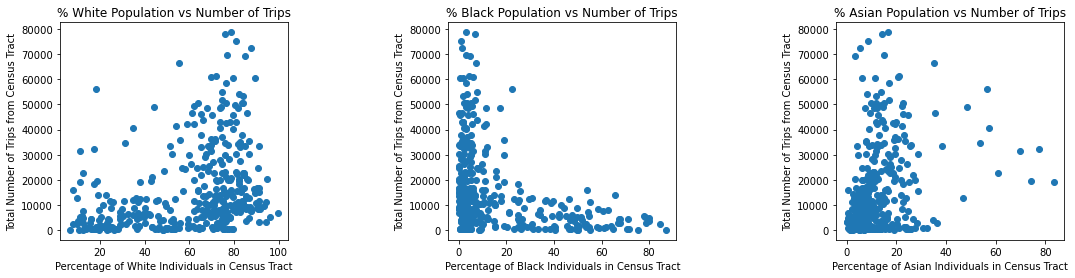

Corr between % of White individuals in a census tracts and # of trips taken from that census tract: 0.33
Corr between % of Black individuals in a census tracts and # of trips taken from that census tract: -0.37
Corr between % of Asian individuals in a census tracts and # of trips taken from that census tract: 0.29


In [17]:
num_trips_geoid = DataFrame(trips_df.groupby('start_station_geoid').size()).rename(columns={0:'num_trips_from_geoid'}).reset_index()
num_stations_geoid = DataFrame(stations_df.groupby('geoid').size()).rename(columns={0:'num_stations'}).reset_index()
num_trips_stations_geoid = num_trips_geoid.merge(num_stations_geoid,left_on='start_station_geoid',right_on='geoid').drop(columns=['start_station_geoid'])
race_trip_station_df = race_income_df.merge(num_trips_stations_geoid,left_on='geoid',right_on='geoid')
race_trip_station_df['trips_per_station'] = race_trip_station_df['num_trips_from_geoid']/race_trip_station_df['num_stations']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.subplots_adjust(wspace=0.7, hspace=None)
fig.set_figwidth(18)

#Percentage White vs number of trips 
ax1.scatter(race_trip_station_df['white_pct'],race_trip_station_df['trips_per_station'])
ax1.set_xlabel('Percentage of White Individuals in Census Tract')
ax1.set_ylabel('Total Number of Trips from Census Tract')
ax1.set_title('% White Population vs Number of Trips')

#percentage Black vs number of trips 
ax2.scatter(race_trip_station_df['black_pct'], race_trip_station_df['trips_per_station'])
ax2.set_xlabel('Percentage of Black Individuals in Census Tract')
ax2.set_ylabel('Total Number of Trips from Census Tract')
ax2.set_title('% Black Population vs Number of Trips')

#percentage Asian vs number of trips 
ax3.scatter(race_trip_station_df['asian_pct'], race_trip_station_df['trips_per_station'])
ax3.set_xlabel('Percentage of Asian Individuals in Census Tract')
ax3.set_ylabel('Total Number of Trips from Census Tract')
ax3.set_title('% Asian Population vs Number of Trips')
plt.show()

print('Corr between % of White individuals in a census tracts and # of trips taken from that census tract: {:.2f}'.format(race_trip_station_df.corr()[['white_pct']].loc['trips_per_station'][0]))
print('Corr between % of Black individuals in a census tracts and # of trips taken from that census tract: {:.2f}'.format(race_trip_station_df.corr()[['black_pct']].loc['trips_per_station'][0]))
print('Corr between % of Asian individuals in a census tracts and # of trips taken from that census tract: {:.2f}'.format(race_trip_station_df.corr()[['asian_pct']].loc['trips_per_station'][0]))

These three scatter plots show the relationship between the total number of trips taken from a census tract and the percentage of each racial race in the census tract. 

From the scatter plot on the left, we see that census tracts with many trips generally also have a higher percentage of White individuals. This is indicated by most of the points with a high average y value being located on the right-hand side of the graph. The correlation score of 0.33 also supports this trend. On the other hand, from the center graph, we see that census tracts with a large percentage of Black individuals have a relatively small number of trips. This is also supported by the negative correlation score of -0.37. Lastly, it's hard to determine the relationship between the number of trips and Asian individuals from the last graph. That being said, the positive correlation score, 0.29, suggests that census tracts with a higher Asian proportion tend to have more trips.

From these diagrams and correlation values, we can conclude that White census tracts tend to be the ones that have the most trips. Therefore, Citi Bike's decision to place more stations in generally Whiter census tracts makes sense. However, a possible limitation is that predominantly White census tracts may have a higher number of trips purely because they have more stations. Thus, to determine whether stations are distributed fairly, we will look into station utilization rate.

Station Utilization Rate = (total Trips in census tract) / (total number of Stations)


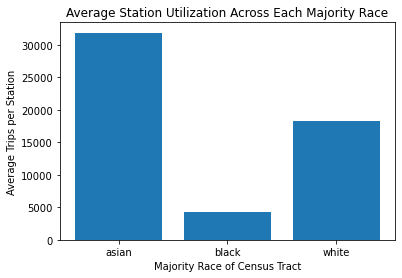

In [18]:
#find the predominant race in each census tract
race_trip_station_df['predominant_race']=race_trip_station_df[['white_pct','black_pct','asian_pct']].idxmax(axis=1).apply(lambda x: 'white' if x=='white_pct' else('black' if x=='black_pct' else 'asian'))
#normalizing number of trips in each census tract by the number of stations
race_trip_station_df['normalized_trips']=race_trip_station_df['num_trips_from_geoid']/race_trip_station_df['num_stations']
ratio_trips_stations_by_race = race_trip_station_df.groupby('predominant_race')['normalized_trips'].mean()

plt.title("Average Station Utilization Across Each Majority Race")
plt.ylabel("Average Trips per Station")
plt.xlabel("Majority Race of Census Tract")
plt.bar(ratio_trips_stations_by_race.index,list(ratio_trips_stations_by_race))
plt.show()


To address the previous limitation, we normalized the number of trips taken from each census tract by the number of stations located in the census tract. This ratio can also be thought of as the station's utilization. Thus, this bar graph shows the average station utilization rate for White, Black, and Asian majority census tracts.

For a fair distribution of stations, we would expect an equal utilization rate across the three racial categories. However, from the bar graph, we can see that this is not the case. On average, each station in an Asian census tract serves more than 30,000 trips, whereas White and Black census tracts serve approximately 18,000 and 5,000 trips, respectively. Thus, Citi Bike has placed too few stations in Asian census tracts and too many in Black census tracts.

Overall, from this graph, we can conclude that Citi Bike is justified in placing more stations in White census tracts indicated by their high utilization. Furthermore, Citi Bike's decision to put fewer stations in Black census tracts is also justified by the meager utilization rate: indicating too many stations in those tracts. However, the critical takeaway is that Citi Bike should be placing more stations in predominantly Asian areas. The very high utilization rate of stations in Asian census tracts indicates that the demand for Citi Bike is much greater than its supply, demonstrating a shortage of stations. Next, to see if Citi Bike is addressing this issue, we will look into where Citi Bike has been building its stations.


### Predicting Where Stations Will be Made 

Ideally Citi Bike should have recognized the issue mentioned previously, and should be building stations in Asian census tracts at a faster rate compared to in White and Black census tracts. To investigate their efforts to solve the issue, we will analyze the rate in which Citi Bike stations are being added to White, Asian, and Black census tracts.

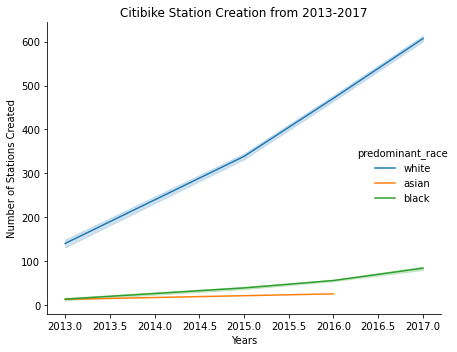

In [19]:
race_income_df['predominant_race']=race_income_df[['white_pct','black_pct','asian_pct']].idxmax(axis=1).apply(lambda x: 'white' if x=='white_pct' else('black' if x=='black_pct' else 'asian'))
stations_df = stations_df.merge(race_income_df[['geoid','predominant_race']],left_on='geoid',right_on='geoid')
stations_df['first_trip']=pd.to_datetime(stations_df['first_trip'])
stations_df['cum_total_stations_per_race'] = stations_df.groupby('predominant_race')['first_trip'].rank(method='first',ascending=True)
stations_df['year_station_made'] = stations_df['first_trip'].apply(lambda x: x.year)

sns.relplot(x='year_station_made',y='cum_total_stations_per_race',hue='predominant_race',data=stations_df,kind='line')
plt.title('Citibike Station Creation from 2013-2017')
plt.xlabel('Years')
plt.ylabel('Number of Stations Created')
plt.tight_layout()
plt.show()

This line graph demonstrates the change in the number of Citi Bike stations in each majority race since 2013, the year Citi Bike started in NYC. We see that since 2013, the number of Citi Bike stations in White census tracts has increased rapidly. On the other hand, Citi Bike stations in Black and Asian areas have increased very slowly. Thus, this shows how Citibike has continued to emphasize creating stations in White census tracts while neglecting Asian and Black census tracts. Therefore, it seems Citi Bike has not recognized the station shortage in Asian census tracts. To confirm this finding, we will next use a Linear Regression model to predict the number of Citi Bike stations to see whether Citi Bike will adequately account for the current problem in the future.

In [20]:
def station_predictor_by_race(race):
    '''
    Predicts the number of stations in neighborhoods of the given predominant race in 2019-2025
    '''
    dates = pd.Series(['2018-01-01','2019-01-01','2020-01-01','2021-01-01','2022-01-01','2023-01-01','2024-01-01','2025-01-01'])
    dates=pd.to_datetime(dates)
    dates  = dates.map(dt.datetime.toordinal) #convert dates to numeric so they can be used as the input to the regression
    stations_predictor = LinearRegression()
    stations_race = stations_df[stations_df['predominant_race']==race]
    stations_predictor.fit(stations_race[['first_trip_numeric']],stations_race['cum_total_stations_per_race'])
    return stations_predictor.predict(dates.values.reshape(-1,1))

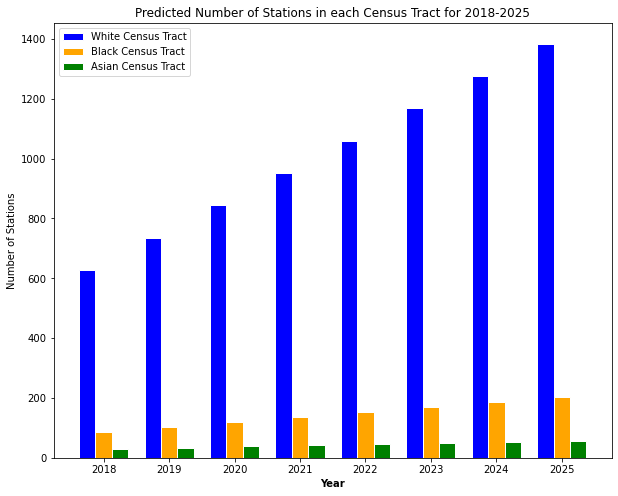

In [21]:
stations_df['first_trip_numeric']  = stations_df['first_trip'].map(dt.datetime.toordinal)
num_white_stations = station_predictor_by_race('white')
num_black_stations = station_predictor_by_race('black')
num_asian_stations = station_predictor_by_race('asian')
dates = [2018,2019,2020,2021,2022,2023,2024,2025]

# set width of bars
barWidth = 0.25 
# Set position of bar on X axis
r1 = np.arange(len(num_white_stations))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

fig = plt.figure(figsize = (10,8))
# Make the plot
plt.bar(r1, num_white_stations, color='blue', width=barWidth, edgecolor='white', label='White Census Tract')
plt.bar(r2, num_black_stations, color='orange', width=barWidth, edgecolor='white', label='Black Census Tract')
plt.bar(r3, num_asian_stations, color='green', width=barWidth, edgecolor='white', label='Asian Census Tract')
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(num_white_stations))], ['2018', '2019', '2020', '2021', '2022', '2023','2024','2025'])
plt.ylabel('Number of Stations')
plt.title('Predicted Number of Stations in each Census Tract for 2018-2025')
# Create legend & Show graphic
plt.legend()
plt.show()

This bar graph shows the predicted number of stations from 2018 to 2025, assuming Citi Bike doesn't deviate from its current placement strategy. We see that the number of stations in majority Asian and Black census tracts increases slowly, whereas the number of stations in White census tracts increases the most. This confirms our intuition that if Citi Bike doesn't change how it places stations, station shortage in Asian census tracts will persist. Thus, Citi Bike should update its current strategy and establish more stations in Asian neighborhoods.

### Trips vs Income 

Having explored the fairness of Citi Bike placing more stations in White census tracts, we now want to evaluate the fairness of Citi Bike placing more stations in higher income areas. To do this, we will explore the relationship between the number of trips taken and the income level of the census tract.

In [22]:
NY_map = folium.Map(location=[40.7563748, -73.9808861],zoom_start = 13) 
trip_q1=np.percentile(race_trip_station_df["normalized_trips"],25)
trip_q2=np.percentile(race_trip_station_df["normalized_trips"],50)
trip_q3=np.percentile(race_trip_station_df["normalized_trips"],75)
for i in range(len(race_trip_station_df["2017_median_income"])-1):
    if race_trip_station_df["normalized_trips"][i+1]<trip_q1:
        folium.CircleMarker(location=[race_trip_station_df["cent_lat"][i+1],race_trip_station_df["cent_lon"][i+1]], radius=race_trip_station_df["2017_median_income"][i+1]/10000, fill=True, color = 'red',fill_opacity=0.7).add_to(NY_map)
    
    elif (race_trip_station_df["normalized_trips"][i+1]>trip_q1 and race_trip_station_df["normalized_trips"][i+1]<trip_q2):
        folium.CircleMarker(location=[race_trip_station_df["cent_lat"][i+1],race_trip_station_df["cent_lon"][i+1]], radius=race_trip_station_df["2017_median_income"][i+1]/10000, fill=True, color = 'green',fill_opacity=0.7).add_to(NY_map)

    elif (race_trip_station_df["normalized_trips"][i+1]>trip_q2 and race_trip_station_df["normalized_trips"][i+1]<trip_q3):
        folium.CircleMarker(location=[race_trip_station_df["cent_lat"][i+1],race_trip_station_df["cent_lon"][i+1]], radius=race_trip_station_df["2017_median_income"][i+1]/10000, fill=True, color = 'blue',fill_opacity=0.7).add_to(NY_map)
    else:
        folium.CircleMarker(location=[race_trip_station_df["cent_lat"][i+1],race_trip_station_df["cent_lon"][i+1]], radius=race_trip_station_df["2017_median_income"][i+1]/10000, fill=True, color = 'yellow',fill_opacity=0.7).add_to(NY_map)
NY_map


<em>To load this map, use jupyter notebook. (File -> Trust Notebook)</em>

This map shows how the number of trips relates to the income level across all of the census tracts in NYC that have at least one Citi Bike station. In this graph, the income level of a census tract is grouped into four distinct groups: 1st quartile, 2nd quartile, 3rd quartile, and 4th quartile colored red, green, blue, and yellow, respectively. The location of each dot corresponds to the census tract location, and its size represents the number of trips taken from each station in the census tract, indicating station utilization.

From the generally smaller size of the red dots, we can see that census tracts with below 25th percentile median income on average have fewer trips per station compared to the other income levels. Thus, stations in generally more impoverished areas are less utilized. Furthermore, the smallest yellow points are larger than the average green and blue points. Therefore, even the worst utilized stations in census tracts in the fourth income quartile still have a higher station utilization rate than the average census tract in the second and third quartiles. 

Overall, from this map, we suspect a positive relationship between a census tract’s median income level and its station utilization rate. Next, to confirm and further investigate this relationship, we will use linear regression to model it.


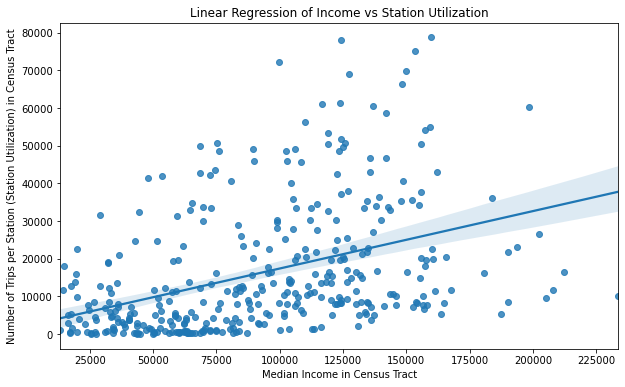

Income slope: 0.15
R^2 score: 0.17


In [23]:
lr = LinearRegression()
lr.fit(race_trip_station_df[['2017_median_income']], race_trip_station_df['trips_per_station'])
X = race_trip_station_df['2017_median_income']
Y = race_trip_station_df['trips_per_station']

fig = plt.subplots( figsize=(10,6))
sns.regplot(x=X, y=Y)
plt.title('Linear Regression of Income vs Station Utilization')
plt.xlabel('Median Income in Census Tract')
plt.ylabel('Number of Trips per Station (Station Utilization) in Census Tract')

plt.show()

print('Income slope: {:.2f}'.format(lr.coef_[0]))
print('R^2 score: {:.2f}'.format(lr.score(race_trip_station_df[['2017_median_income']], race_trip_station_df['trips_per_station'])))

In [24]:
pear_corr=race_trip_station_df['2017_median_income'].corr(race_trip_station_df['trips_per_station'])
sp_corr= race_trip_station_df['2017_median_income'].corr(race_trip_station_df['trips_per_station'],method='spearman')

print('Pearson Correlation: ',"{:.2f}".format(pear_corr))
print('Spearman Correlation: ',"{:.2f}".format(sp_corr))

Pearson Correlation:  0.41
Spearman Correlation:  0.51


In general, the graph shows the higher the median income in a census tract, the higher its station utilization rate. The positive slope of 0.15 can be interpreted as a one-dollar increase in the median income resulting in a 0.15 increase in the station utilization rate of the census tract. The R^2 score of 0.17 indicates that income alone explains around 17% of the variability in station utilization rate. This 17% is slightly low but makes sense since we’ve seen that other factors such as racial distribution of a census tract play a role in determining station utilization rate. Furthermore, the Pearson correlation of 0.41 and the Spearman correlation of 0.51 signifies that the strength of the relationship between median income and the number of trips per station is moderate.

Thus, if we view fairness in terms of station placement being solely determined by demand, Citi Bike’s decision to place more stations in higher-income census tracts is justified by the higher utilization rate in higher-income areas.


# 5. Evaluation of Significance 

### 1. Evaluation of Significance for Preregistered Analysis 1

Our analysis one concluded that the relationship between the trips and stations was moderate and positive. In this step of the project, we will evaluate through permutation the statistical significance of this relationship. 

####  Permutation of Trips & Stations


Here, we have created a permutation function that will shuffle the trips to remove any association between trips and stations.

In [25]:
def permute(input_array):
    permuted = input_array.copy()
    np.random.shuffle(permuted)
    return permuted

Using this function, we produce a null hypothesis experiment by breaking the relationship between the trips and stations. We will then calculate various slopes between the permuted trips and stations. Then to test the significance of our previous finding, we will measure the fraction of the time we see a slope greater than or equal to the one we see in our actual dataset. 

In [26]:
def plot_model_line(df, model, is_resampled=True):
    '''
    Takes a dataframe and a fitted model
    Plots a line of best fit to the data
    '''
    if is_resampled:
        color="grey"
        alpha=0.1
    else:
        color="steelblue"
        alpha=0.7
    plt.plot(df['Number of Stations'], df['Number of Stations'] * model.coef_[0] + model.intercept_, color=color, alpha=alpha)

This function will plot the different permuted regression slopes in Gray and the original data's permuted slope in Blue. This allows us to visualize the relationship between the actual regression slope and the permuted regression slopes. In our next step, we will plot 100 iterations of this function. 

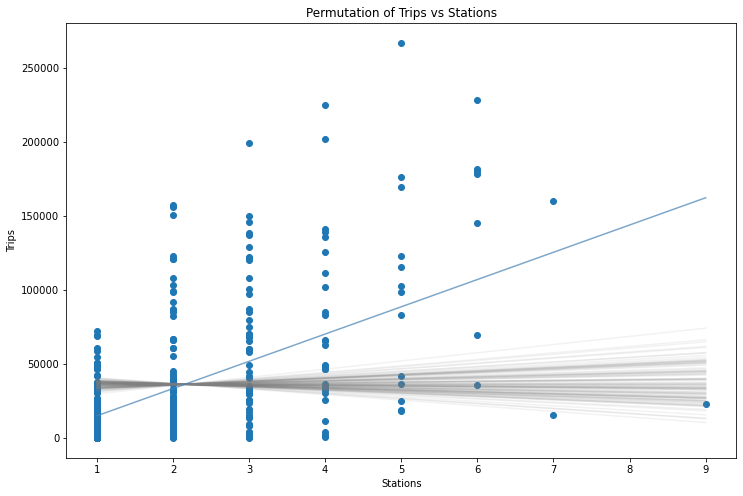

In [27]:
fig = plt.subplots(figsize=(12,8))

# plot true data
plt.scatter(trips_start_df['Number of Stations'],trips_start_df['Number of Trips'])

# plot 100 iterations of models on permuted data
for i in range(100):
    fake_model = LinearRegression().fit(trips_start_df[['Number of Stations']],permute(trips_start_df['Number of Trips']))
    plot_model_line(trips_start_df, fake_model)

# model true data and plot
model = LinearRegression().fit(trips_start_df[['Number of Stations']],trips_start_df['Number of Trips'])
plot_model_line(trips_start_df, model, is_resampled=False)
    
plt.xlabel('Stations')
plt.ylabel('Trips')
plt.title('Permutation of Trips vs Stations')
    
plt.show()

The result of our permutation shows that there are no slopes that are steeper than our observed slope. Next, we will conduct this permutation 10,000 times to get a more accurate estimate of how likely we are to observe the same pattern as our original data.


In [28]:
steeper_slopes = 0
n_permutations = 10000
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    fake_model = LinearRegression().fit(trips_start_df[['Number of Stations']], permute(trips_start_df['Number of Trips']))
    
    permuted_slopes[i] = fake_model.coef_[0]
    
    if np.abs(fake_model.coef_[0]) > np.abs(model.coef_):
        steeper_slopes += 1
    
print("Percentage of slopes that are greater than our observed slope",steeper_slopes / n_permutations)

Percentage of slopes that are greater than our observed slope 0.0


Out of the 10000 iterations, we never observed a permuted regression slope that was steeper than our original slope. This means there is a near-zero chance of observing a slope this large under our null hypothesis. Thus we reject the null hypothesis. We will next plot a histogram to show this distribution more clearly.


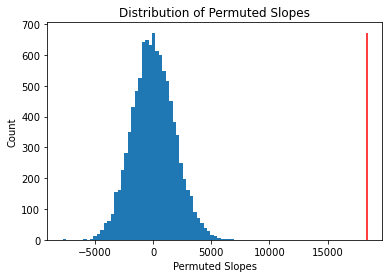

In [29]:
binsizes, _, _ = plt.hist(permuted_slopes, bins=50)
plt.vlines(model.coef_[0], ymin=0, ymax=np.max(binsizes), color='red')

plt.xlabel('Permuted Slopes')
plt.ylabel('Count')
plt.title('Distribution of Permuted Slopes')
plt.show()

The red vertical line in this histogram is the original slope. Once again, we can see through this histogram that when we permute the y-values(stations) and repeat the process 10000 times, we never observe a slope as steep as the one in our original data. This can be confirmed through the location of the red line at the far end of the graph. Thus, we never observe a slope greater than or equal to our observed slope under the null hypothesis, meaning that we reject the null hypothesis. This means that the relationship we observed in Analysis 1 between the number of trips and the number of stations was not random.

### 2. Evaluation of Significance for Analysis 3 - Income vs Trips per Station

In Analysis three, we found a moderately positive relationship between median income and the number of trips per station in each census tract. So now, in this step of the project, we will evaluate whether the relationship was due to random chance. 

In [30]:
def plot_model_line(df, model, is_resampled=True):
    '''
    Takes a dataframe and a fitted model
    Plots a line of best fit to the data
    '''
    if is_resampled:
        color="grey"
        alpha=0.1
    else:
        color="steelblue"
        alpha=0.7
    plt.plot(df['2017_median_income'], df['2017_median_income'] * model.coef_[0] + model.intercept_, color=color, alpha=alpha)

Now for our next step we will plot 100 iterations of models on our permuted data and visualize that on a graph.

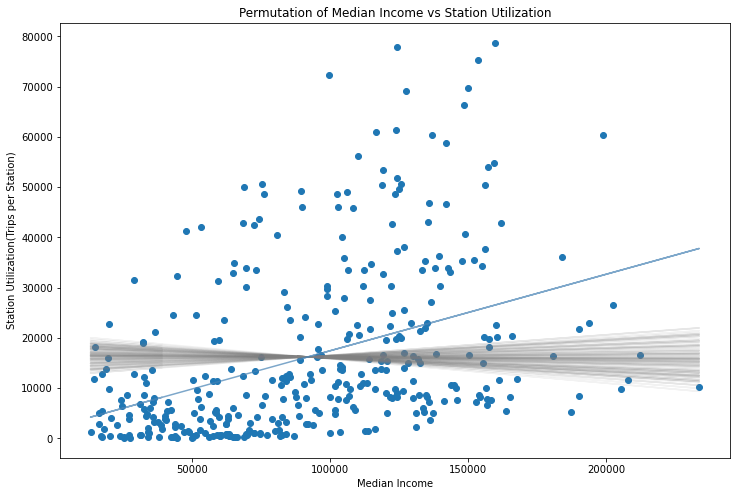

In [31]:
fig = plt.subplots(figsize=(12,8))

# plot true data
plt.scatter(race_trip_station_df['2017_median_income'], race_trip_station_df['trips_per_station'])

# plot 100 iterations of models on permuted data
for i in range(100):
    fake_model = LinearRegression().fit(race_trip_station_df[['2017_median_income']], permute(race_trip_station_df['trips_per_station']))
    plot_model_line(race_trip_station_df, fake_model)

# model true data and plot
model = LinearRegression().fit(race_trip_station_df[['2017_median_income']], race_trip_station_df['trips_per_station'])
plot_model_line(race_trip_station_df, model, is_resampled=False)
    
plt.xlabel('Median Income')
plt.ylabel('Station Utilization(Trips per Station)')
plt.title('Permutation of Median Income vs Station Utilization')
    
plt.show()

The result of our permutation shows that there are no slopes that are steeper than our observed slope. All the gray lines of permuted regression slopes are less steep compared to our original slope. 

In [32]:
steeper_slopes = 0
n_permutations = 10000
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    fake_model = LinearRegression().fit(race_trip_station_df[['2017_median_income']], permute(race_trip_station_df.trips_per_station))
    
    permuted_slopes[i] = fake_model.coef_[0]
    
    if np.abs(fake_model.coef_[0]) > np.abs(model.coef_):
        steeper_slopes += 1
    
print("Percentage of slopes that are greater than our observed slope",steeper_slopes / n_permutations)

Percentage of slopes that are greater than our observed slope 0.0


Out of the 10000 iterations we created, we were never able to observe a permutation regression slope that was steeper than our data's original observed regression slope. This means that there is a near-zero probability of observing a slope this large under a null hypothesis. Therefore, we reject the null hypothesis. Thus, the conclusion we reached in Analysis Three shows a linear relationship between median income and trips per station, which is statistically significant and not due to random chance. 

# Interpretation and Conclusion 

In attempting to answer our research question of whether Citi Bike is fairly distributing its stations in NYC, we performed three analyses. 

First, to understand the influence of demand on station placement, we looked at the relationship between trips and stations. We observed a positive relationship between trips and stations in our scatterplot and more significant variability in trips as the stations increased. By plotting the location of geoids with the most stations on a map, we were able to find that geoids located near parks or docks had more stations regardless of the number of trips. In our linear regression, we numerically confirmed a moderately positive relationship between trips and stations with a Pearson correlation of 0.51 and a regression slope of 1.84e+04. Furthermore,  we found that the R^2 score was 0.279, indicating that stations explained only 28% of the variability in trips. This led us to believe that other factors were influencing the number of stations in a census tract.

Thus, we investigated whether race and income play a role. In doing so, we found that census tracts with higher than the median number of stations were 77% White. On the other hand, census tracts below the median were 67% White indicating more stations were placed in Whiter areas. Moreover, through logistic regression, we found that the probability of a census tract having above the median number of stations increases with the proportion of White individuals. In contrast, this probability decreases as the proportion of Black and Asian individuals increases. Furthermore, through logistic regression between stations and income, we found that the likelihood of a census tract having above the median number of stations increases as the median income increases. Thus overall, we found that besides the number of trips, race and income also influence the number of stations in a census tract. More importantly, more stations are generally placed in White and higher-income census tracts. 

To determine the fairness of Citi Bike’s decision to place more stations in generally Whiter and higher-income census tracts, we looked at station utilization with race and income. Station utilization rate was defined as the ratio between the number of trips and stations in a census tract. We defined fairness as the placement of more stations in high-demand areas to ensure an equal utilization rate across all stations. 

Comparing station utilization across all stations in majority Asian, Black, and White census tracts, we observed that on average, they had 30000, 5000, and 18000 trips per station, respectively. This relatively high station utilization rate in White areas justifies Citi Bike’s decision to place more stations in Whiter census tracts, as they are just responding to demand. Moreover, the exceptionally high utilization rate in Asian census tracts, though it points to effective utilization, also implies a shortage of stations compared with the other census tracts. Predicting the future placement of Citi Bike stations, using linear regression, we observed that the number of stations in Asian census tracts would not increase significantly in the seven years from 2018 to 2025. Thus, if Citi Bike does not improve its current station placement strategy and begin focusing on Asian census tracts, this shortage will persist.

Finally, we analyzed station utilization across census tracts with different median income levels. We first found that census tracts whose median income falls below the 25th percentile have lower station utilization. Moreover, census tracts in the 75th percentile have a consistently high station utilization. Therefore, we suspected a positive relationship between income and station utilization and confirmed this through linear regression. The R^2 value of 0.17 suggests that 17 percent of the variability in the station utilization is explained by income. The Pearson Correlation, 0.41, and Spearman correlation, 0.51, indicates that the relationship between income and station utilization is moderate. Therefore, we conclude that Citi Bike is justified in placing more stations in higher-income census tracts as they have higher station utilization rates. 

Overall, we have observed that Citi Bike’s current placement of stations is not equitable, according to our definition of fairness. Additionally, our predictive analysis showed that Citi Bike would fail to address these issues in the years following 2017 if they remain complacent with their current strategy. Therefore we recommend Citi Bike address the problems we detailed above by increasing the availability of stations in Asian census tracts. 
If we had more time, we could have used other metrics to evaluate fairness, such as determining whether price is a prohibitive factor for Citi Bike utilization. Ideally, to do so, we would need a population survey detailing a person’s income, ethnicity, and the maximum price they would be willing to pay for Citi Bike. Furthermore, if we could delve deeper into the topic, we would bring other data sets on road quality and crime rates in different census tracts. These hypothetical data sets would then be used to gain insight into how safety concerns affect a person’s decision to utilize Citi Bike.

# Limitations

### Overall Limitations

- We acknowledge that race and income are not the only factors contributing to the distribution of Citi Bike stations around NYC. 
- Since our data were based on Citi Bikes in 2017, our results are limited to that year only. That being said, they may be an indicator of how Citi Bike stations are distributed for other years.
- The data limits our definition of fairness in this project. There may be other definitions of fairness that we cannot evaluate in this project. 
- Using census tracts as the geographical standard for dividing across different regions in NYC may have affected our results. If we used smaller geographical metrics (such as streets), we might have gotten more accurate and insightful results. 


### Citi Bike Trip Limitations

- The trip data only includes the Subscribers, which is about 90% of the original total trip data. Though there may be some one-time customers from NYC residents, due to a large amount of data, we decided to settle on subscribers since there is a higher chance that these individuals were New York City residents. So our data may not be representative of other NYC residents that may have only used one-time passes.
- We dropped rows where the start station equals the end station. When this occurs, we assume that most of these cases are people having trouble using Citi Bike initially. However, there may be cases where people made round trips and returned them to the same location for some of the trips where the start and end stations are the same. 


### Citi Bike Stations Limitations

- The station start date is not the date the station was added to the network but instead the date at which the first trip was taken from the station, which might not always be the same. However, this start date was used as a proxy for the date in which Citi Bike stations were made in our linear regression to predict future numbers of stations in each majority race census tract. 

### Race and Income Limitations

- There are only three racial categories and one additional ‘other’ racial category in our data. This indicates that some ethnicities are not reflected in the data. 
- Populations like the homeless or digital nomads may not be recorded in the data. 


## Source Code 

1. Team Github
https://github.com/shljessie/citibike-nyc

2. Team Raw Data Google Drive
https://drive.google.com/drive/folders/197_d1BwPHXmVuyKA6I7UEyEw4Nqo8dAk

3. Team Final Data Google Drive
https://drive.google.com/drive/folders/1glgD5ly1ABej2GDXzc-iUMjpu4HkItwa?usp=sharing


## Acknowledgements

1) MIT Citi Bike study : https://aberke.github.io/income-race-bikes/

2) Equity in Citi Bike study : https://trec.pdx.edu/research/project/884

3) Lecture Notes: https://colab.research.google.com/drive/1pMK18-DQoBDA_9rSzio6LJtkCJWxJF1g?usp=drive_open#scrollTo=6p2-tZKgM4He

4) Stack Overflow, Pandas, Matplotlib Documentation :
-  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html
-  https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

<em>
Special Thanks to Professor Wilkens, Head TA Stephen Cowpar, and all the TAs we have met in office hours and interacted through Ed in helping us answer our research question properly, find methods to solve our problems, and refine the direction of our project. :) </em>


## Appendix

Citibike Trip DataCleaning Notebook : https://github.com/shljessie/citibike-nyc/blob/master/project_phase_submissions/Data_Cleaning.ipynb
